In [1]:
import numpy as np
import math as math
import random
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats, shapiro, levene
import scipy as sp
import seaborn as sns
import collections 

<li> <b> Извлечение и чистка данных <b>

In [2]:
def extract_data(file_name):
    data = pd.read_csv(file_name, encoding = "cp1251", sep = ";|,", engine = "python")
    col1 = data.iloc[:, 0].to_numpy(); col2 = data.iloc[:, 1].to_numpy(); col3 = data.iloc[:, 2].to_numpy()
    work_days = []; age = []; gender = []
    for i in range(len(col1)):
        work_days.append(int(col1[i].split('"')[1]))
        age.append(int(col2[i]))
        gender.append(col3[i].split('""')[1])
    work_days = np.array(work_days); age = np.array(age); gender = np.array(gender)
    return work_days, age, gender

In [3]:
work_days, age, gender = extract_data('М.Тех_Данные_к_ТЗ_DS.csv')
my_dict = {'Количество больничных дней': work_days , 'Возраст': age, 'Пол': gender}
data = pd.DataFrame(my_dict)
data.style

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
5,4,38,М
6,1,49,Ж
7,1,44,М
8,3,42,Ж
9,4,36,М


In [4]:
def percent(a,b):
    try:
        return (a/b)*100
    except ZeroDivisionError:
        print("Ошибка: деление нулем")

<li> <b> Анализ   <b>

In [5]:
def analyze_data(work_days, age, gender):
    female_workers = np.count_nonzero(gender == 'Ж'); male_workers = np.count_nonzero(gender == 'М')
    workers_over_35 = np.count_nonzero(age > 35); young_workers = np.count_nonzero(age <= 35)
    risk_by_gender = []; risk_by_age = []
    for i in range(len(work_days)):
        if work_days[i] > 2:
            risk_by_gender.append(gender[i])
            risk_by_age.append(age[i])
    risk_by_gender = np.array(risk_by_gender); risk_by_age = np.array(risk_by_age)
    females_risk_group = np.count_nonzero(risk_by_gender == 'Ж'); male_risk_group = np.count_nonzero(risk_by_gender == 'М')
    over_35_risk_group = np.count_nonzero(risk_by_age > 35); young_risk_group = np.count_nonzero(risk_by_age <= 35)
    females_percent = percent(females_risk_group, female_workers); male_percent = percent(male_risk_group, male_workers)
    over_35_percent = percent(over_35_risk_group, workers_over_35); young_workers_percent = percent(young_risk_group, young_workers)
    risk_group = np.array([male_risk_group,females_risk_group,over_35_risk_group, young_risk_group])
    all_workers = np.array([male_workers, female_workers,workers_over_35, young_workers])
    percentage = np.array([male_percent,females_percent,over_35_percent, young_workers_percent])
    return percentage, risk_group, all_workers

In [6]:
percentage,risk_group, all_workers = np.around(analyze_data(work_days, age, gender), decimals=2, out=None)
percentage = ["%.2f" % i + "%" for i in percentage]
people_number = risk_group[0]+risk_group[1]
males = percent(risk_group[0],people_number); females = percent(risk_group[1],people_number)
over_35 = percent(risk_group[2],people_number); young = percent(risk_group[3], people_number)
by_all = np.around([males,females,over_35,young], decimals=2, out=None); by_all = ["%.2f" % i + "%" for i in by_all]


data_dict = {'Категория персонала' : ['Мужчины', 'Женщины', 'Старше 35 лет', 'Младше 35 лет'],
             'Процент пропускающих работу из данной категории' : percentage,'Доля которую составляет категория в группе из всех пропускающих' : by_all }
data_frame = pd.DataFrame(data_dict)
data_frame.style

,Категория персонала,Процент пропускающих работу из данной категории,Доля которую составляет категория в группе из всех пропускающих
0,Мужчины,60.43%,55.63%
1,Женщины,68.37%,44.37%
2,Старше 35 лет,63.89%,76.16%
3,Младше 35 лет,63.16%,23.84%


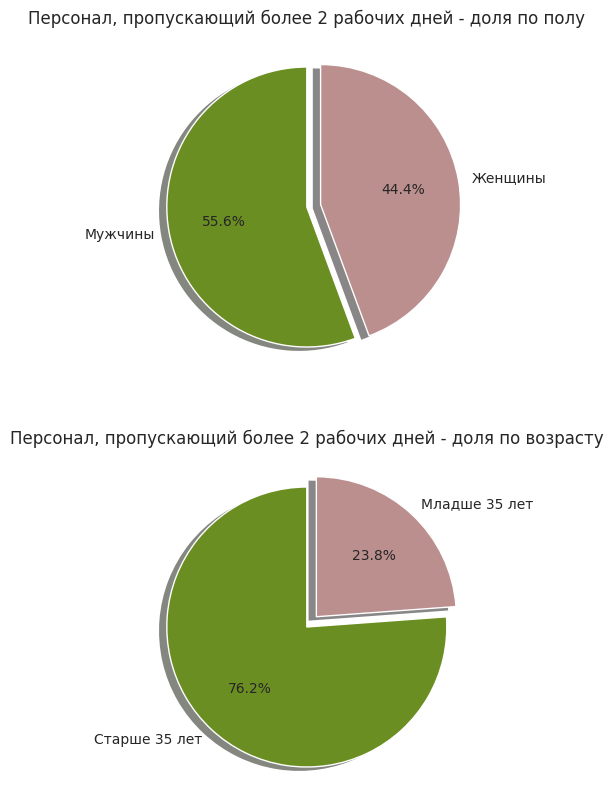

In [20]:
fig, ax = plt.subplots(2, figsize=(15, 10))
explode = (0, 0.1) 
ax[0].pie([risk_group[0], risk_group[1]], explode=explode, labels=['Мужчины', 'Женщины'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90,colors = ['olivedrab', 'rosybrown'])
ax[0].set_title("Персонал, пропускающий более 2 рабочих дней - доля по полу")

explode = (0, 0.1) 
ax[1].pie([risk_group[2], risk_group[3]], explode=explode, labels=['Старше 35 лет', 'Младше 35 лет'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors = ['olivedrab', 'rosybrown'])
ax[1].set_title("Персонал, пропускающий более 2 рабочих дней - доля по возрасту")
plt.show()

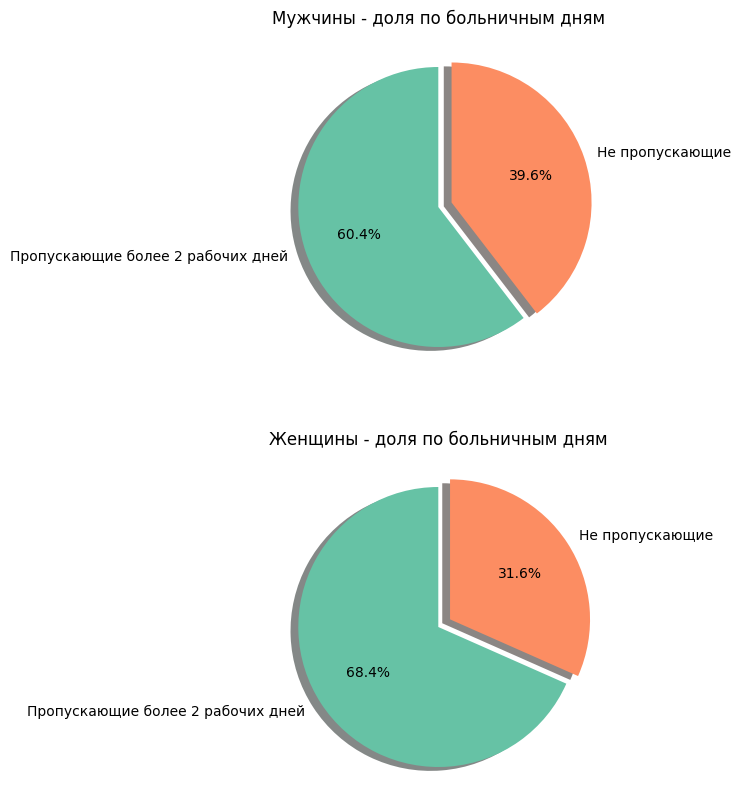

In [8]:
fig, ax = plt.subplots(2, figsize=(15, 10))
explode = (0, 0.1) 
ax[0].pie([risk_group[0], all_workers[0]-risk_group[0]], explode=explode, labels=['Пропускающие более 2 рабочих дней ', 'Не пропускающие'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors=sns.color_palette('Set2'))
ax[0].set_title("Мужчины - доля по больничным дням")

explode = (0, 0.1) 
ax[1].pie([risk_group[1], all_workers[1]-risk_group[1]], explode=explode, labels=['Пропускающие более 2 рабочих дней ', 'Не пропускающие'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors=sns.color_palette('Set2'))
ax[1].set_title("Женщины - доля по больничным дням")
plt.show()

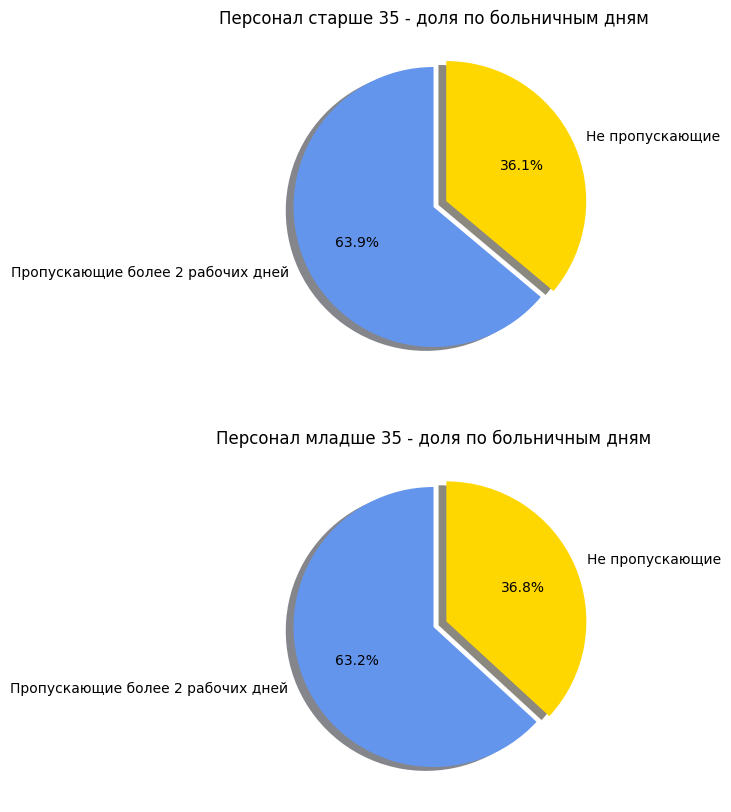

In [9]:
fig, ax = plt.subplots(2, figsize=(15, 10))
explode = (0, 0.1) 
ax[0].pie([risk_group[2], all_workers[2]-risk_group[2]], explode=explode, labels=['Пропускающие более 2 рабочих дней ', 'Не пропускающие'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors = ['cornflowerblue','gold'])
ax[0].set_title("Персонал старше 35 - доля по больничным дням")

explode = (0, 0.1) 
ax[1].pie([risk_group[3], all_workers[3]-risk_group[3]], explode=explode, labels=['Пропускающие более 2 рабочих дней ', 'Не пропускающие'], autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors = ['cornflowerblue','gold'])
ax[1].set_title("Персонал младше 35 - доля по больничным дням")
plt.show()

In [10]:
def get_distribution(work_days, age, gender): 
    days = np.unique(work_days)
    female = []; male = []; over_35 = []; young_workers = []
    for i in range(len(work_days)):
        if gender[i] == 'М':
            male.append(work_days[i])
        if gender[i] == 'Ж':
           female.append(work_days[i])
        if age[i] > 35:
            over_35.append(work_days[i])
        if age[i] <= 35:
            young_workers.append(work_days[i])
    data = {'Мужчины': male,'Женщины': female, 
    'Старше 35 лет': over_35,'Младше 35 лет': young_workers}
    return data

<li> <b> Графики и гистограмы распределения по количеству больничных дней <b>

In [11]:
values = get_distribution(work_days, age, gender)
by_gender = dict(list(values.items())[0: 2])  
by_age = dict(list(values.items())[2: 4]) 

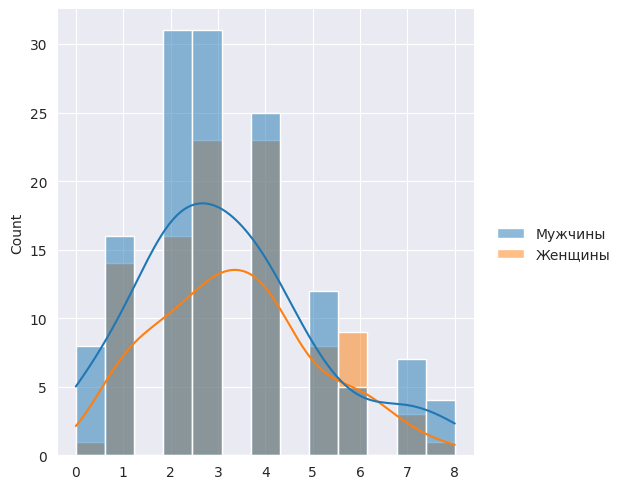

In [12]:
data = get_distribution(work_days, age, gender)
sns.set_style("darkgrid")
sns.displot(by_gender, kde=True)

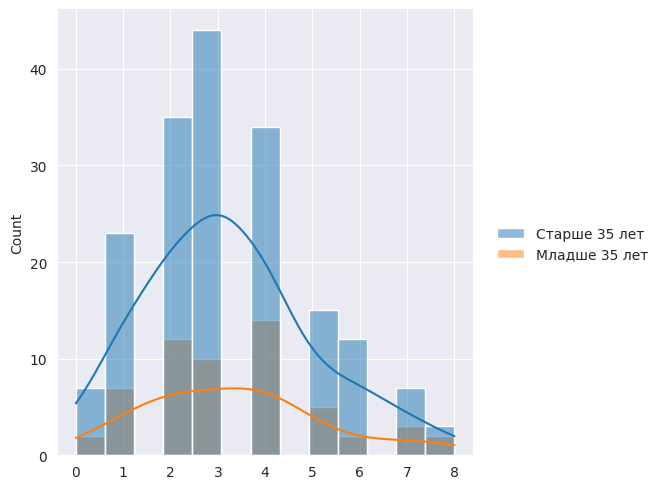

In [13]:
sns.displot(by_age, kde=True)
sns.set_style("darkgrid")

<li> <b> Статистические тесты <b>

Поставим нулевую гипотезу: между средними значениями количества пропусков двух групп нет значимого отличия. Сначала нужно проверить нормальность распределения средних в выборке. Для этого используем тест Шапиро — Уилка. Нулевая гипотеза в критерии Шапиро — Уилка: переменная распределена нормально. Если получаем значение p-value больше 0.05, то не можем отклонить нулевую гипотезу. Для проверки равенства дисперсий вычислим критерий Левене. Нулевая гипотеза критерия Левене: дисперсии в двух выборках не имеют значимых различий. Если дисперсии не равны, то при вычислении t-статистики применяется поправка Уэлча.

In [14]:
def shapiro_test(data):
    t, p = shapiro(data); alpha = 0.05
    if p > alpha:
        print("Нормальное распределение")
    else:
        print("Распределение не являетсья нормальним")
    return t, p

In [15]:
def levene_test(group1,group2):
    t, p = levene(group1, group2); alpha = 0.05
    if p > alpha:
        print("Дисперсии в двух выборках не имеют значимых различий")
        flag = True
    else:
        print("Дисперсии отличаютcья")  
        flag = False
    return t,p,flag

In [16]:
def t_test(group1, group2, flag):
    t, p = ttest_ind(group1, group2, equal_var=flag); alpha = 0.05
    if (p < alpha):
        print("Отвергаем нулевую гипотезу - группы отличаютсья")
    else:
        print("Нулевую гипотезу не получилось отвергнуть - различие между группами незначимо")
    return t,p

In [17]:
man = values['Мужчины']; woman = values['Женщины']
older_group = values['Старше 35 лет']; younger_group = values['Младше 35 лет']

<li> <b> Группы распределены по полу <b>

In [18]:
t1,p1 = shapiro_test(all_workers)
t2,p2,flag2 = levene_test(man,woman)
t3,p3 = t_test(man, woman, flag2)
dict_ = {'Тип теста': ["Шапиро — Уилка","Левене","t-тест"]  , 't-stat': [t1,t2,t3], 'p-value':[p1,p2,p3] }
data = pd.DataFrame(dict_)
data.style

Нормальное распределение
Дисперсии в двух выборках не имеют значимых различий
Нулевую гипотезу не получилось отвергнуть - различие между группами незначимо


,Тип теста,t-stat,p-value
0,Шапиро — Уилка,0.992912,0.971877
1,Левене,0.452803,0.501668
2,t-тест,-0.785630,0.432875


<li> <b> Группы распределены по возрасту <b>

In [19]:
t2,p2,flag2 = levene_test(older_group,younger_group)
t3,p3 = t_test(older_group,younger_group, flag2)
dict_ = {'Тип теста': ["Шапиро — Уилка","Левене","t-тест"]  , 't-stat': [t1,t2,t3], 'p-value':[p1,p2,p3] }
data = pd.DataFrame(dict_)
data.style

Дисперсии в двух выборках не имеют значимых различий
Нулевую гипотезу не получилось отвергнуть - различие между группами незначимо


,Тип теста,t-stat,p-value
0,Шапиро — Уилка,0.992912,0.971877
1,Левене,0.390991,0.532386
2,t-тест,-0.447263,0.655097


Вывод: на основании полученных данных были выдвинуты гипотезы. Эти гипотезы были проверены с помощью t-статистики критерия Стьюдента. 
В итоге, было получено, что нет значимых отличий в частоте пропусков как у мужчин и женщин, так и у людей старше 35 лет и их молодых коллег.  